# Make Use of Data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#reading data from local csv
data = pd.read_csv("covid-19.csv")
data.shape

(1942, 6)

In [2]:
data

,Province/State,Country,Date,Confirmed,Deaths,Recovered
0,Hong Kong,Hong Kong,01/22/2020 17:00:00,NaN,NaN,NaN
1,NaN,Japan,01/22/2020 17:00:00,2.0,NaN,NaN
2,Macau,Macau,01/22/2020 17:00:00,1.0,NaN,NaN
3,Anhui,Mainland China,01/22/2020 17:00:00,1.0,NaN,NaN
4,Beijing,Mainland China,01/22/2020 17:00:00,14.0,NaN,NaN
...,...,...,...,...,...,...
1937,Hong Kong,Hong Kong,02/20/2020 23:13:05,68.0,2.0,6.0
1938,Chongqing,Mainland China,02/20/2020 23:13:05,567.0,6.0,299.0
1939,Shanxi,Mainland China,02/20/2020 23:13:05,132.0,0.0,76.0
1940,Yunnan,Mainland China,02/20/2020 23:13:05,174.0,2.0,79.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942 entries, 0 to 1941
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  1413 non-null   object 
 1   Country         1942 non-null   object 
 2   Date            1942 non-null   object 
 3   Confirmed       1923 non-null   float64
 4   Deaths          1501 non-null   float64
 5   Recovered       1554 non-null   float64
dtypes: float64(3), object(3)
memory usage: 91.2+ KB


In [4]:
data.describe()

,Confirmed,Deaths,Recovered
count,1923.000000,1501.000000,1554.000000
mean,510.552262,15.906063,79.267696
std,4186.684476,143.659017,585.051632
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,13.000000,0.000000,2.000000
75%,116.000000,1.000000,19.000000
max,62442.000000,2144.000000,11788.000000


In [5]:
#checking for duplicate rows
duplicate_rows = data.duplicated(subset = ['Country', 'Province/State', 'Date'])
data[duplicate_rows]

,Province/State,Country,Date,Confirmed,Deaths,Recovered
441,NaN,Cambodia,01/31/2020 08:15:53,1.0,0.0,0.0
442,NaN,Cambodia,01/31/2020 08:15:53,1.0,0.0,0.0
443,NaN,Cambodia,01/31/2020 08:15:53,1.0,0.0,0.0
444,NaN,Cambodia,01/31/2020 08:15:53,1.0,0.0,0.0
445,NaN,Cambodia,01/31/2020 08:15:53,1.0,0.0,0.0
...,...,...,...,...,...,...
1858,NaN,Germany,02/18/2020 17:03:03,16.0,0.0,12.0
1859,NaN,Germany,02/18/2020 17:03:03,16.0,0.0,12.0
1872,Qinghai,Mainland China,02/19/2020 04:53:02,18.0,0.0,16.0
1878,NaN,Malaysia,02/19/2020 09:33:03,22.0,0.0,15.0


In [6]:
data = data.drop_duplicates(subset = ['Country', 'Province/State', 'Date'])
data

,Province/State,Country,Date,Confirmed,Deaths,Recovered
0,Hong Kong,Hong Kong,01/22/2020 17:00:00,NaN,NaN,NaN
1,NaN,Japan,01/22/2020 17:00:00,2.0,NaN,NaN
2,Macau,Macau,01/22/2020 17:00:00,1.0,NaN,NaN
3,Anhui,Mainland China,01/22/2020 17:00:00,1.0,NaN,NaN
4,Beijing,Mainland China,01/22/2020 17:00:00,14.0,NaN,NaN
...,...,...,...,...,...,...
1937,Hong Kong,Hong Kong,02/20/2020 23:13:05,68.0,2.0,6.0
1938,Chongqing,Mainland China,02/20/2020 23:13:05,567.0,6.0,299.0
1939,Shanxi,Mainland China,02/20/2020 23:13:05,132.0,0.0,76.0
1940,Yunnan,Mainland China,02/20/2020 23:13:05,174.0,2.0,79.0


In [7]:
country_list = list(data['Country'].unique())
print(country_list)
print(len(country_list))

['Hong Kong', 'Japan', 'Macau', 'Mainland China', 'South Korea', 'Taiwan', 'Thailand', 'US', 'Australia', 'Brazil', 'Colombia', 'Malaysia', 'Mexico', 'Philippines', 'Singapore', 'Vietnam', 'France', 'Nepal', 'Canada', 'Cambodia', 'Ivory Coast', 'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'Russia', 'Sweden', 'UK', 'Spain', 'Belgium', 'Others', 'Egypt', 'Iran']
35


In [8]:
#merging China and Mainland China
data.loc[data['Country'] == 'Mainland China','Country'] = 'China'

/opt/miniconda3/envs/hacklytics/lib/python3.7/site-packages/pandas/core/indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
print(list(data['Date'].unique()))
print(len(list(data['Date'].unique())))

['01/22/2020 17:00:00', '01/23/2020 17:00:00', '01/24/2020 17:00:00', '01/25/2020 17:00:00', '01/26/2020 16:00:00', '01/27/2020 23:59:00', '01/28/2020 23:00:00', '01/29/2020 19:30:00', '01/30/2020 16:00:00', '01/31/2020 08:15:00', '01/31/2020 08:15:53', '01/31/2020 10:37:00', '01/31/2020 15:20:00', '01/31/2020 15:20:56', '01/31/2020 16:13:00', '01/31/2020 16:13:45', '01/31/2020 23:59:00', '02/01/2020 01:52:00', '02/01/2020 01:52:40', '02/01/2020 02:13:00', '02/01/2020 02:13:26', '02/01/2020 05:37:00', '02/01/2020 06:05:00', '02/01/2020 07:38:00', '02/01/2020 07:38:12', '02/01/2020 07:51:00', '02/01/2020 08:43:00', '02/01/2020 09:17:00', '02/01/2020 10:33:00', '02/01/2020 10:43:00', '02/01/2020 10:53:00', '02/01/2020 11:03:00', '02/01/2020 11:53:00', '02/01/2020 13:33:00', '02/01/2020 14:03:00', '02/01/2020 14:23:00', '02/01/2020 15:23:00', '02/01/2020 15:43:00', '02/01/2020 15:53:00', '02/01/2020 17:43:00', '02/01/2020 18:12:00', '02/01/2020 18:12:49', '02/01/2020 18:33:00', '02/01/202

In [10]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date_date'] = data['Date'].apply(lambda x:x.date())
print(data['Date'])
print(data['Date_date'] )

0      2020-01-22 17:00:00
1      2020-01-22 17:00:00
2      2020-01-22 17:00:00
3      2020-01-22 17:00:00
4      2020-01-22 17:00:00
               ...        
1937   2020-02-20 23:13:05
1938   2020-02-20 23:13:05
1939   2020-02-20 23:13:05
1940   2020-02-20 23:13:05
1941   2020-02-20 23:43:02
Name: Date, Length: 1319, dtype: datetime64[ns]
0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
1937    2020-02-20
1938    2020-02-20
1939    2020-02-20
1940    2020-02-20
1941    2020-02-20
Name: Date_date, Length: 1319, dtype: object


/opt/miniconda3/envs/hacklytics/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/miniconda3/envs/hacklytics/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
#getting the total number of confirmed cases for each country
df_country = data.groupby(['Country'])['Confirmed', 'Deaths', 'Recovered'].max().reset_index(drop = None)
print(df_country)

                 Country  Confirmed  Deaths  Recovered
0              Australia        5.0     0.0        4.0
1                Belgium        1.0     0.0        1.0
2                 Brazil        NaN     NaN        NaN
3               Cambodia        1.0     0.0        1.0
4                 Canada        5.0     0.0        1.0
5                  China    62442.0  2144.0    11788.0
6               Colombia        NaN     NaN        NaN
7                  Egypt        1.0     0.0        0.0
8                Finland        1.0     0.0        1.0
9                 France       12.0     1.0        4.0
10               Germany       16.0     0.0       12.0
11             Hong Kong       68.0     2.0        6.0
12                 India        3.0     0.0        3.0
13                  Iran        5.0     2.0        0.0
14                 Italy        3.0     0.0        0.0
15           Ivory Coast        1.0     NaN        NaN
16                 Japan       94.0     1.0       18.0
17        

/opt/miniconda3/envs/hacklytics/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [12]:
#no of cases reported each day
df_by_date = data.groupby(['Date_date']).sum().reset_index(drop = None)
df_by_date['daily_cases'] = df_by_date.Confirmed.diff()
df_by_date['daily_deaths'] = df_by_date.Deaths.diff()
df_by_date['daily_recoveries'] = df_by_date.Recovered.diff()
df_by_date

,Date_date,Confirmed,Deaths,Recovered,daily_cases,daily_deaths,daily_recoveries
0,2020-01-22,555.0,17.0,28.0,NaN,NaN,NaN
1,2020-01-23,653.0,18.0,30.0,98.0,1.0,2.0
2,2020-01-24,941.0,26.0,36.0,288.0,8.0,6.0
3,2020-01-25,1438.0,42.0,39.0,497.0,16.0,3.0
4,2020-01-26,2118.0,56.0,52.0,680.0,14.0,13.0
5,2020-01-27,2927.0,82.0,61.0,809.0,26.0,9.0
6,2020-01-28,5578.0,131.0,107.0,2651.0,49.0,46.0
7,2020-01-29,6165.0,133.0,126.0,587.0,2.0,19.0
8,2020-01-30,8235.0,171.0,143.0,2070.0,38.0,17.0
9,2020-01-31,10037.0,213.0,229.0,1802.0,42.0,86.0


# Plotting the data

Text(0.5, 0, 'Dates')

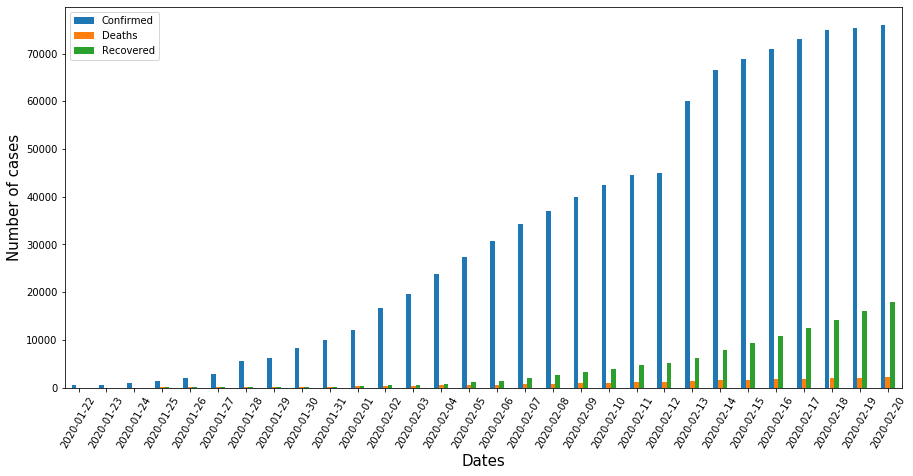

In [13]:
#setting the image size
plt.rcParams['figure.figsize'] = (15,7)

#plotting the cases by date
data.groupby(['Date_date']).sum().plot(kind='bar')
plt.xticks(rotation = 60)
plt.ylabel('Number of cases',fontsize=15)
plt.xlabel('Dates',fontsize = 15)

Text(0.5, 0, 'Dates')

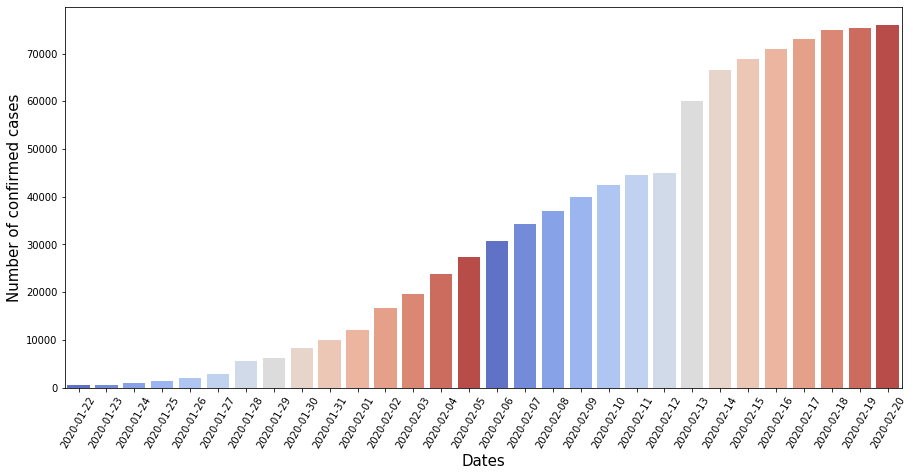

In [14]:
# no of confirmed cases by date
sns.axes_style("whitegrid")
sns.barplot(x = "Date_date",
            y = "Confirmed",
            data=data.groupby(['Date_date']).sum().reset_index(drop=None),
            palette=sns.color_palette("coolwarm", 15))

plt.xticks(rotation=60)
plt.ylabel('Number of confirmed cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)

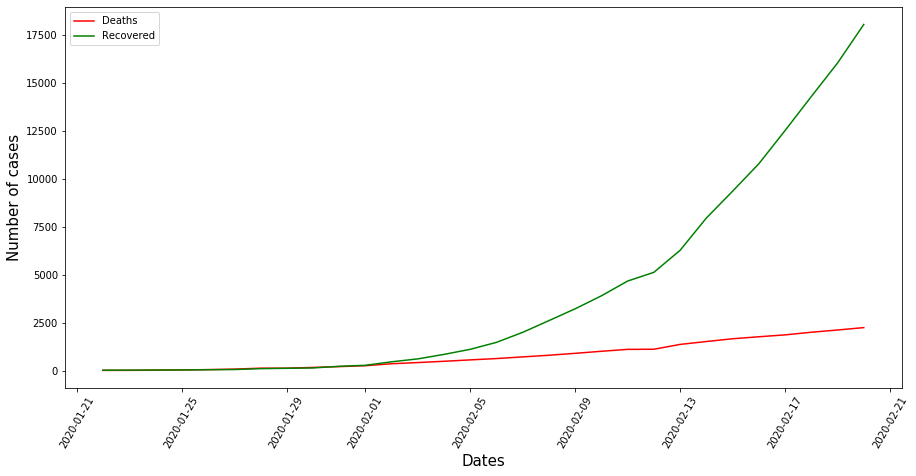

In [15]:
#plotting two line plots for deaths and recoveries respectively

plt.plot('Date_date', 'Deaths', data=data.groupby(['Date_date']).sum().reset_index(drop=None), color='red')
plt.plot('Date_date', 'Recovered', data=data.groupby(['Date_date']).sum().reset_index(drop=None), color='green')
plt.xticks(rotation=60)
plt.ylabel('Number of cases',fontsize=15)
plt.xlabel('Dates',fontsize=15)
plt.legend()
plt.show()

Text(0.5, 0, 'Countries')

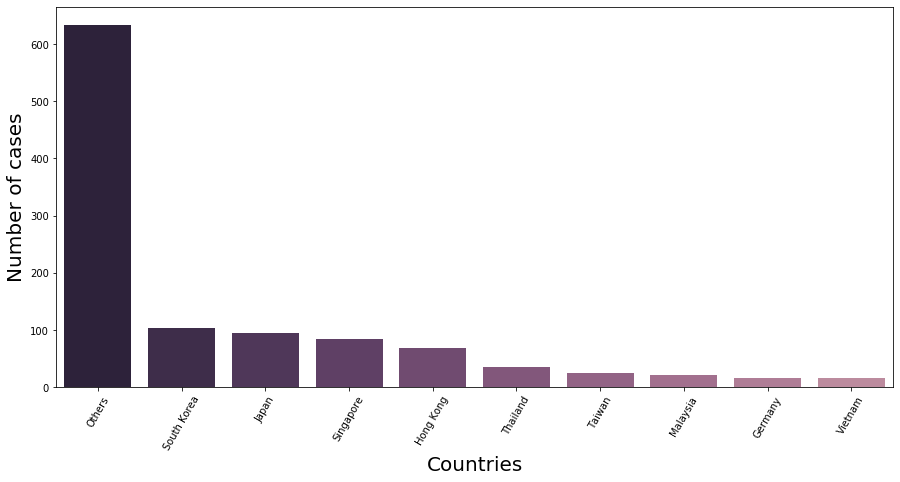

In [16]:
#We know that China is the most affected country by a large margin, 
#so lets create a bar plot to compare countries other than China

sns.barplot(x = "Country",
            y = "Confirmed",
            data = df_country[df_country.Country != 'China'].nlargest(10,'Confirmed'),
            palette = sns.cubehelix_palette(15, reverse = True)
           )

plt.xticks(rotation = 60)
plt.ylabel('Number of cases',fontsize = 20)
plt.xlabel('Countries',fontsize = 20)

Text(0.5, 0, 'Dates')

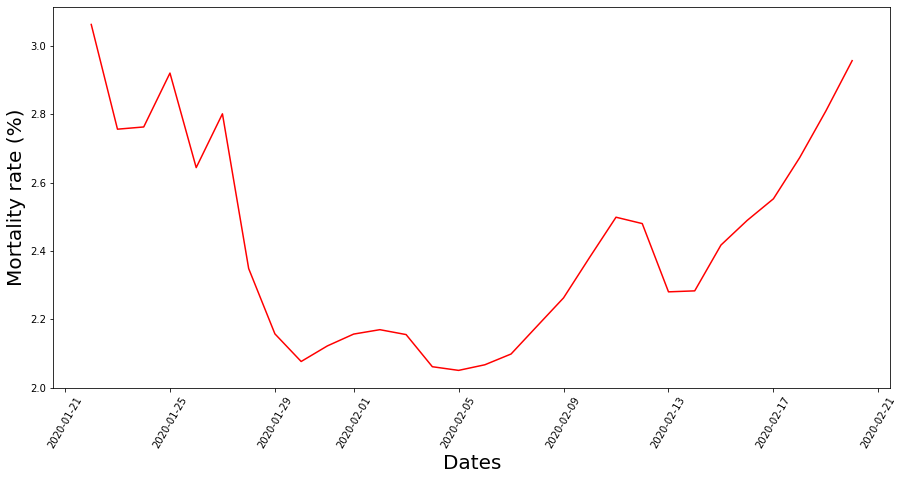

In [17]:
#The mortality rate, at any point in time, can be roughly calculated 
#by dividing the number of deaths by the number of confirmed cases
df_by_date['mrate'] = df_by_date.apply(lambda x: x['Deaths'] * 100 / (x['Confirmed']), axis=1)
plt.plot('Date_date','mrate',data = df_by_date, color='red')

plt.xticks(rotation = 60)
plt.ylabel('Mortality rate (%)',fontsize = 20)
plt.xlabel('Dates',fontsize = 20)

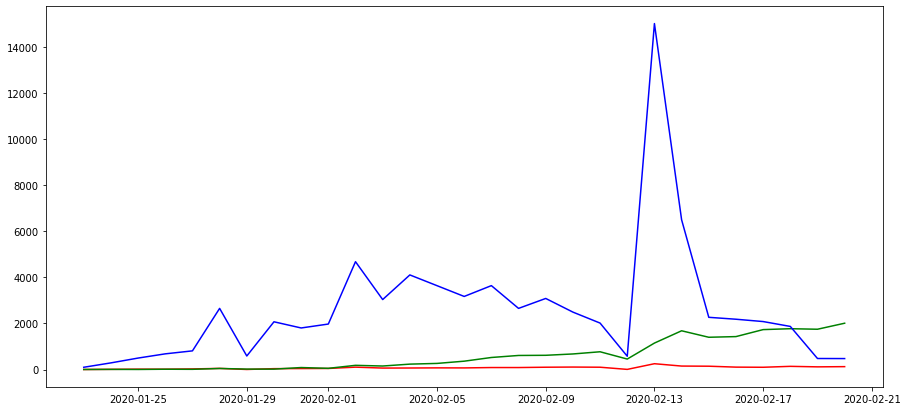

In [18]:
plt.plot('Date_date', 'daily_deaths', data = df_by_date, color = 'red')
plt.plot('Date_date', 'daily_recoveries', data = df_by_date, color = 'green')
plt.plot('Date_date', 'daily_cases', data = df_by_date, color = 'blue')

/opt/miniconda3/envs/hacklytics/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Provinces')

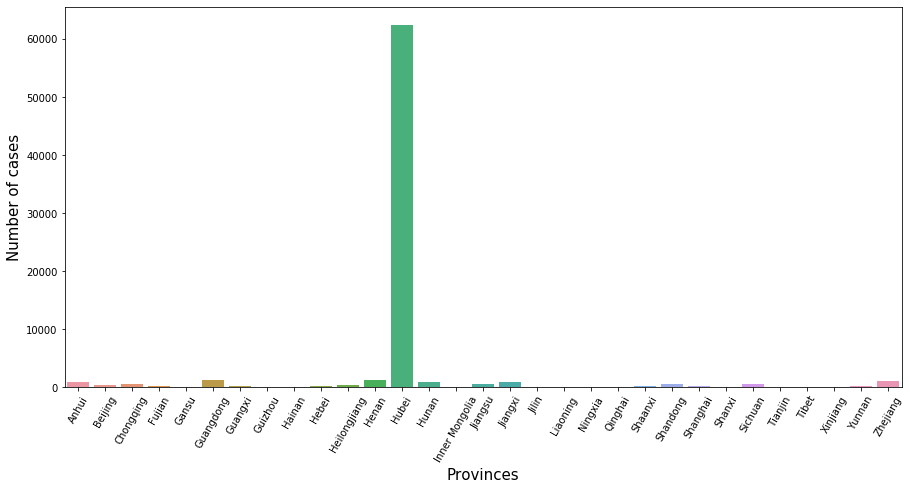

In [19]:
#creating a separate dataframe for provinces and making a bar plot

df_province = data[data['Country'] =='China'].groupby(['Province/State'])['Confirmed', 'Deaths', 'Recovered'].max().reset_index(drop=None)
sns.barplot(x="Province/State", y = "Confirmed", data=df_province,ci=None)
plt.xticks(rotation=60)
plt.ylabel('Number of cases',fontsize = 15)
plt.xlabel('Provinces',fontsize = 15)

Text(0, 0.5, 'Number of cases')

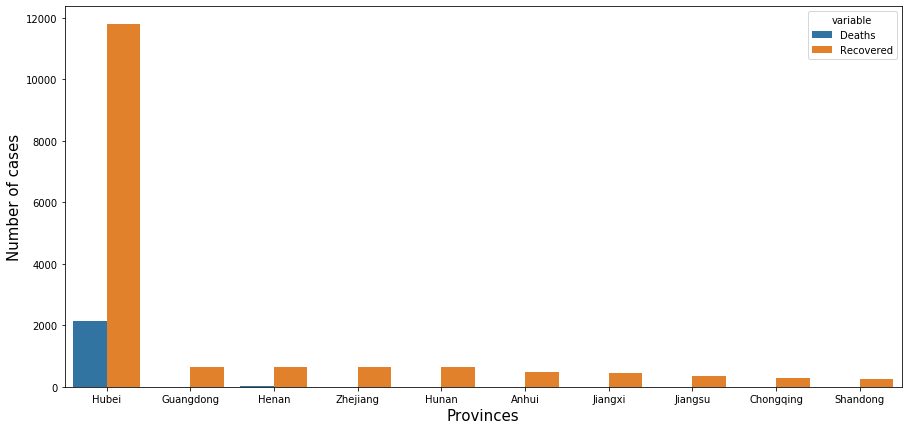

In [20]:
#selecting 10 most affected provinces
df_province = df_province.nlargest(10,'Confirmed')

df_province = df_province[['Province/State','Deaths','Recovered']]

#for multi-bar plots in seaborn, we need to melt the dataframe so #that the the deaths and recovered values are in the same column
df_province = df_province.melt(id_vars = ['Province/State'])

sns.barplot(x ='Province/State', y = 'value', hue = 'variable', data = df_province)
plt.xlabel('Provinces',fontsize = 15)
plt.ylabel('Number of cases',fontsize = 15)